# Fine-tuning Machine Learning Model

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') # style used
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Diagnosing classification predictions
- With confusion matrix retrieve the accuracy
    - Accuracy metrics
    - Precicion metrics
    - Recall metrics
    - F1score metrics
    - High precision
    - High recall

In [2]:
# import library confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
# import datasets
filepath = 'data/csv/diabetes.csv'
diabetes_df = pd.read_csv(filepath)
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = diabetes_df.drop('diabetes', axis=1) # features
y = diabetes_df['diabetes'] # target

In [5]:
# y = y.reshape(-1, 1)

In [6]:
# create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# initialize KNN with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

In [7]:
# fit training data
knn.fit(X_train, y_train)

# make prediction with test data
y_pred = knn.predict(X_test)

In [8]:
knn.score(X_test, y_test)

0.7207792207792207

In [9]:
# generate confusion matrix
confusion_matrix(y_test, y_pred)

array([[176,  30],
       [ 56,  46]], dtype=int64)

In [10]:
# generate classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



# Logistic regression
- For true or false classification
- logistic regression output probability 'p'
- p > 0.5 = true
- p < 0.5 = false

In [11]:
# import library
from sklearn.linear_model import LogisticRegression

In [12]:
# create logreg
logreg = LogisticRegression()

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# fit data
logreg.fit(X_train, y_train)

# predict data
y_pred = logreg.predict(X_test)

In [13]:
# accuracy score
logreg.score(X_test, y_test)

0.7662337662337663

## Plotting ROC curve

In [14]:
# import library
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

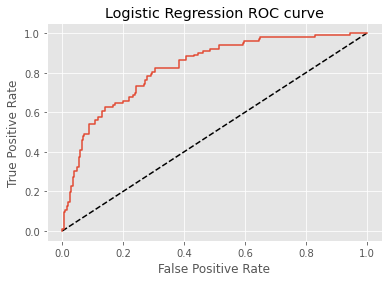

In [15]:
# plotting
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.show()

## Compute Area under ROC (AUC)

In [16]:
from sklearn.metrics import roc_auc_score

In [19]:
# create logreg
logreg = LogisticRegression()

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# fit data
logreg.fit(X_train, y_train)

# probability and auc score
y_pred_prob = logreg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob)

0.8260517799352751

In [27]:
# AUC using cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
print(f'AUC scores computed using 5-fold cross-validation = {cv_scores}')

AUC scores computed using 5-fold cross-validation = [0.80814815 0.80777778 0.82666667 0.87471698 0.83433962]


## Hyperparameter tuning
Example :
- Linear Regression : Choosing parameters
- Ridge/Lasso regression : Choosing alpha
- KNN : Choosing n_neighbors

Hyperparameter cannot be learned by fitting a model
- Try a couple of different parameters value
- Fit all of them and compare it
- Choose the best performing

Method used : 
- GridSearchCV
- RandomizedSearchCV

In [31]:
# GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# specify hyperparameter as a dict
param_grid = {'n_neighbors': np.arange(1, 50)}

# initialize KNN
knn = KNeighborsClassifier()

# performs CV with grid search
knn_cv = GridSearchCV(knn, param_grid, cv=5)

# fit the data
knn_cv.fit(X, y)

# best parameters used
print(knn_cv.best_params_)

# best score
print(knn_cv.best_score_)

{'n_neighbors': 14}
0.7578558696205755


In [52]:
# GridSearchCV with logistic regression

# setup hyperparameter
c_space = np.logspace(-2, 1, 15)
param_grid = {'C': c_space}

# initialize logreg
logreg = LogisticRegression()

# performs CV with grid search
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# fit the data
logreg_cv.fit(X, y)

# best parameters used
print(logreg_cv.best_params_)

# best score
print(logreg_cv.best_score_)

{'C': 10.0}
0.7747899159663865


In [53]:
# Hyperparameter with RandomizedSearchCV in Decision Tree Classifier
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# setup hyperparameter
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# initialize Decision Tree
dtree = DecisionTreeClassifier()

# pervorm 5-fold CV with RandomizedSearch
dtree_cv = RandomizedSearchCV(dtree, param_dist, cv=5)

# fit data
dtree_cv.fit(X, y)

# best parameters used
print(dtree_cv.best_params_)

# best score
print(dtree_cv.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 6}
0.7396316102198455


In [56]:
c_space = np.logspace(-2, 1, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 0.043939705607607904, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7717391304347826
